In [1]:
import numpy as np    # import required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import multivariate_normal
import statistics as st
import pickle


In [10]:
import pymc3 as pm


You can find the C code in this temporary file: /var/folders/8v/dhsjr8kx65zc4znwz1gn49l00000gn/T/theano_compilation_error_vwi8mt7_
library imit=] is not found.


AttributeError: partially initialized module 'theano' has no attribute 'gof' (most likely due to a circular import)

In [16]:
import theano.tensor as tt

### Read the data

In [4]:
df = pd.read_csv("Desktop/la-haute-borne-data.csv")

wd = list(df.Wa_avg)  #  Absolute_wind_direction_corrected
ws = list(df.Ws_avg)   # Average wind speed

### Data cleaning

In [5]:
wd = [x for x in wd if math.isnan(x) == False]   

ws= [x for x in ws if math.isnan(x) == False]


### Distribution of avarage wind direction

(array([15965., 21622., 12217.,  9654., 21933., 39657., 43229., 27675.,
        13608., 10370.]),
 array([  0.,  36.,  72., 108., 144., 180., 216., 252., 288., 324., 360.]),
 <BarContainer object of 10 artists>)

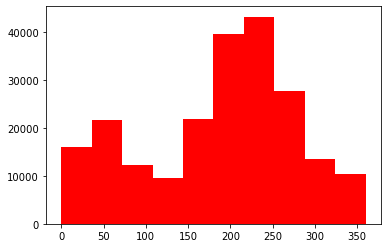

In [6]:
plt.hist(df.Wa_avg,color = 'red')


### Distribution of avarage wind speed

(array([2.9213e+04, 5.5502e+04, 9.0617e+04, 2.6047e+04, 1.0516e+04,
        3.3050e+03, 5.6400e+02, 1.2400e+02, 3.9000e+01, 3.0000e+00]),
 array([ 0.   ,  2.427,  4.854,  7.281,  9.708, 12.135, 14.562, 16.989,
        19.416, 21.843, 24.27 ]),
 <BarContainer object of 10 artists>)

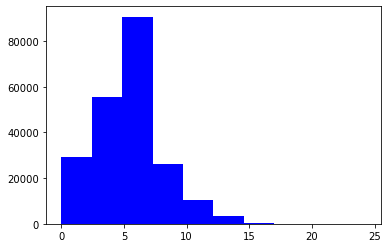

In [7]:
plt.hist(df.Ws_avg,color = 'blue')

### Joint distribution contour plot

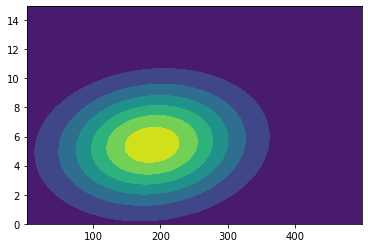

[[8.06329767e+03 2.47497097e+01]
 [2.47497097e+01 7.23873277e+00]]


In [9]:
var_matrix=np.array([wd,ws]).T
mean = np.mean(var_matrix,axis=0)
sigma = np.cov(var_matrix.T)
dist = multivariate_normal(mean, cov=sigma)
x, y = np.mgrid[1:500:.05, 0:15:.05]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y

z = dist.pdf(pos)

plt.contourf(x,y,z)
plt.show()

print(sigma)

### MLE for mean and the covariance matrix

In [12]:
print('mu_bar= ', mean)

print('sigma= ',sigma)

mu_bar=  [187.46797092   5.43257639]
sigma=  [[8.06329767e+03 2.47497097e+01]
 [2.47497097e+01 7.23873277e+00]]


### Bayesian Inference

In [2]:
# MCMC was used for sampling from the posterior to approximate the posterior



In [18]:
data = [wd,ws]
data = np.array(data)

In [11]:
N = 10000
np.random.seed(0)
X = np.random.multivariate_normal(np.array(mean), np.array(sigma), size=N)

with pm.Model() as model:
    # use `shape` argument to define tensor dimensions
    mu = pm.Normal('mu',  shape=2)   # 5   187

    # diagonal values on covariance matrix
    a = pm.Normal('a',  shape=2)

    # convert vector to a 2x2 matrix with `a` on the diagonal
    cov = tt.diag(a)

    likelihood = pm.MvNormal('likelihood', mu=mu, cov=cov, observed=data)

NameError: name 'pm' is not defined

In [ ]:
# inference
    start = pm.find_MAP()
    step = pm.Slice()
    trace = pm.sample(niter, step, start, random_seed=123, progressbar=True)

###  Joint pdf 

In [ ]:
def multivariate_normal(x, d, mean, covariance):
    """pdf of the multivariate normal distribution."""
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * 
            np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))

### Calculate the power

In [2]:
N_t = 10. # number of turbines

P = N_t*(multivariate_normal(x, 2, mean, sigma))

NameError: name 'multivariate_normal' is not defined

### Calculate the cost

In [ ]:

C = N_t * (2/3 + 1/3*np.exp(-0.00174 * (N_t)**2))


### Objective function to be minimised

In [ ]:
obj_fun = N_t* [- (multivariate_normal(x, 2, mean, sigma)) + (2/3 + 1/3*np.exp(-0.00174 * (N_t)**2))]

### NSGA-II

In [10]:
from nsga2.problem import Problem
from nsga2.evolution import Evolution

ModuleNotFoundError: No module named 'nsga2.problem'

In [ ]:
problem = Problem(num_of_variables=2, objectives=[-P, C], variables_range=[(-10, 10)], same_range=True, expand=False)
evo = Evolution(problem, mutation_param=20)
func = [i.objectives for i in evo.evolve()]

function1 = [i[0] for i in func]
function2 = [i[1] for i in func]
plt.xlabel('Function 1', fontsize=15)
plt.ylabel('Function 2', fontsize=15)
plt.scatter(function1, function2)
plt.show()